In [61]:
#Income/Graduation_rate/population

%matplotlib inline

import matplotlib.pyplot as plt

from matplotlib.pyplot import legend
import pandas as pd
import numpy as np
#To read cities_2016.csv
income_data_to_load = "cities_2016.csv"
income_data = pd.read_csv(income_data_to_load)
income_data_df = pd.DataFrame(income_data)
income_data_df["CITY"] = income_data_df["CITY"].apply(lambda x: x.upper())
income_data_df

,Unnamed: 0,YEAR,CITY,MALE_MEDIAN,FEMALE_MEDIAN,TOTAL_MEDIAN,MALE_WORKERS_FULLTIME_YEAR,FEMALE_WORKERS_FULLTIME_YEAR,TOTAL_WORKERS_FULLTIME_YEAR,MALE_MEAN,FEMALE_MEAN,TOTAL_MEAN
0,0,2016,PRINCETON,$40136,$23532,$31864,5628,3447,9075,$160643,$117018,$144073
1,0,2016,SUMMIT,$96595,$50425,$66733,4706,3040,7746,$208726,$125713,$176147
2,0,2016,CLIFTON,$46356,$32416,$38455,18477,14287,32764,$65885,$54350,$60855
3,0,2016,HOBOKEN,$84583,$65797,$73681,15571,13975,29546,$133782,$99666,$117645
4,0,2016,BRIDGETON,$16140,$17168,$16436,4043,2217,6260,$35765,$34507,$35320


In [62]:
#To read graduation rate and population
pop_grad_combined_data_to_load = "pop_grad_combined.csv"
pop_grad_combined_data = pd.read_csv(pop_grad_combined_data_to_load)
pop_grad_combined_data.head()


,dist_year,DISTRICT_NAME_left,SCHOOL_NAME,YEAR,GRAD_RATE,DISTRICT_NAME_right,STNAME,Year,Population
0,ASBURY2014,ASBURY,Asbury Park High School,2014,49.26,ASBURY,New Jersey,2014.0,15892.0
1,ASBURY2014,ASBURY,Asbury Park High School,2014,49.26,ASBURY,New Jersey,2014.0,15892.0
2,ASBURY2014,ASBURY,Asbury Park High School,2014,49.26,ASBURY,New Jersey,2014.0,15892.0
3,ASBURY2014,ASBURY,Asbury Park High School,2014,49.26,ASBURY,New Jersey,2014.0,15892.0
4,ASBURY2015,ASBURY,Asbury Park High School,2015,66.04,ASBURY,New Jersey,2015.0,15789.0


In [63]:
#Selected five cities

pop_grad_combined_data = pop_grad_combined_data.drop_duplicates()
smallset = pop_grad_combined_data[pop_grad_combined_data["DISTRICT_NAME_left"].isin([
    "SUMMIT",
    "PRINCETON",
    "CLIFTON",
    "BRIDGETON",
    "HOBOKEN"    
])]
# smallset_2014 = smallset[smallset["Year"] == 2014]
# smallset_2015 = smallset[smallset["Year"] == 2015]
smallset_2016 = smallset[smallset["Year"] == 2016]
# smallset_2017 = smallset[smallset["Year"] == "2017"]
#smallset_2016
smallset_2016=smallset_2016[["dist_year","DISTRICT_NAME_left","GRAD_RATE","Population"]]
smallset_2016

,dist_year,DISTRICT_NAME_left,GRAD_RATE,Population
324,BRIDGETON2016,BRIDGETON,78.78,24817.0
725,CLIFTON2016,CLIFTON,83.79,86414.0
2116,HOBOKEN2016,HOBOKEN,86.01,55044.0
4847,PRINCETON2016,PRINCETON,94.85,31415.0
5771,SUMMIT2016,SUMMIT,96.09,22238.0


In [64]:
#combined income grad and population
combined_income_and_population = income_data_df.set_index("CITY").join(
smallset_2016.set_index("DISTRICT_NAME_left"))

combined_income_and_population = combined_income_and_population.reset_index()
combined_income_grad_population = combined_income_and_population[["CITY","YEAR","GRAD_RATE","Population","MALE_MEAN","FEMALE_MEAN","TOTAL_MEAN"]].copy()
combined_income_grad_population= combined_income_grad_population.set_index("CITY") 
combined_income_grad_population



,YEAR,GRAD_RATE,Population,MALE_MEAN,FEMALE_MEAN,TOTAL_MEAN
CITY,,,,,,
PRINCETON,2016,94.85,31415.0,$160643,$117018,$144073
SUMMIT,2016,96.09,22238.0,$208726,$125713,$176147
CLIFTON,2016,83.79,86414.0,$65885,$54350,$60855
HOBOKEN,2016,86.01,55044.0,$133782,$99666,$117645
BRIDGETON,2016,78.78,24817.0,$35765,$34507,$35320


In [65]:
#To select just the number part from the total_mean column(to remove $ sign)
combined_income_grad_population["TOTAL_MEAN"] = combined_income_grad_population["TOTAL_MEAN"].apply(lambda x: int(x[1:]))
                                                                                                       
combined_income_grad_population=combined_income_grad_population[["GRAD_RATE","Population","TOTAL_MEAN"]]

#To sort
#combined_income_grad_population =combined_income_grad_population.sort_values(by='CITY', ascending=False)


combined_income_grad_population


                                                                                                       

,GRAD_RATE,Population,TOTAL_MEAN
CITY,,,
PRINCETON,94.85,31415.0,144073
SUMMIT,96.09,22238.0,176147
CLIFTON,83.79,86414.0,60855
HOBOKEN,86.01,55044.0,117645
BRIDGETON,78.78,24817.0,35320


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

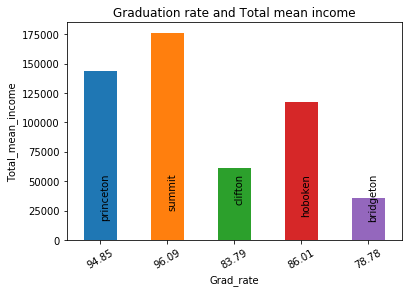

In [66]:
#plot Graduation rate vs Total mean income
ax = combined_income_grad_population.plot.bar(x="GRAD_RATE",y="TOTAL_MEAN",legend=False)
for i, label in enumerate(list(combined_income_grad_population.index)):
    ax.annotate(label.lower(),(i, 50000),ha="left",rotation=90)
plt.title("Graduation rate and Total mean income")
plt.ylabel("Total_mean_income")
plt.xlabel("Grad_rate")
plt.xticks(rotation=30)


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

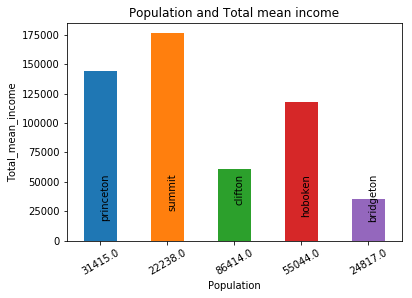

In [67]:
#Plot Population vs Total mean income
ax = combined_income_grad_population.plot.bar(x="Population",y="TOTAL_MEAN",legend=False)
for i, label in enumerate(list(combined_income_grad_population.index)):
    ax.annotate(label.lower(),(i, 50000),ha="left",rotation=90)
plt.title("Population and Total mean income")
plt.ylabel("Total_mean_income")
plt.xlabel("Population")
plt.xticks(rotation=30)


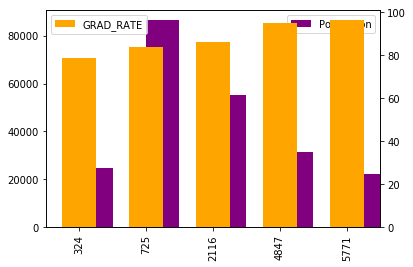

In [68]:
#smallset_2016
fig = plt.figure()
newax1 = fig.add_subplot(111)
newax2 = newax1.twinx()
d = smallset_2016.plot(
    kind="bar",
    ax=newax1,
    position=0,
    color='purple',
    legend=True,
    y="Population",
    
)

smallset_2016.plot(
    kind="bar",
    ax=newax2,
    position=.5,
    color='orange',
    legend=True,
    y="GRAD_RATE"
)